In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('df_filtered.csv')

In [14]:
df=df.drop(columns='Unnamed: 0')

In [15]:
df

,category,city,company_name,crawl_timestamp,job_description,postdate_yyyymmdd,post_date,postdate_in_indexname_format,job_title,job_type,new_date,year,month,day,weekday,hour
0,IT,Kolkata,HTSM Technologies Pvt Ltd,2021-07-02 10:19:09 +0000,Roles and Responsibilities · 2 years of softwa...,20210701,2021-07-01,2021.07.01,Dot Net Developer,Full-time,2021-07-02 10:19:09+00:00,2021,7,2,4,10
1,Architecture,Pune,HSBC,2021-07-08 21:49:45 +0000,The health and safety of our employees and can...,20210708,2021-07-08,2021.07.01,Senior Project Manager/Wholesale IT,Full-time,2021-07-08 21:49:45+00:00,2021,7,8,3,21
2,Agriculture,Bengaluru,bajajallianz,2021-07-08 22:12:19 +0000,Agri-Business Planning Recommend and implement...,20210708,2021-07-08,2021.07.01,Deputy Manager Agri. Business,Full-time,2021-07-08 22:12:19+00:00,2021,7,8,3,22
3,Architecture,Gurgaon,Balbix India Pvt. Ltd,2021-07-08 22:16:49 +0000,WHO WE ARE Balbix is the world's leading platf...,20210708,2021-07-08,2021.07.01,Full Stack Developer,Full-time,2021-07-08 22:16:49+00:00,2021,7,8,3,22
4,Advertising,Pune,Deutsche Bank,2021-07-08 22:45:52 +0000,Job Title: AVP – Java Engineer Location: Pune ...,20210708,2021-07-08,2021.07.01,AVP – Java Engineer,Full-time,2021-07-08 22:45:52+00:00,2021,7,8,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25533,IT,Hyderabad,Salesforce,2021-10-01 00:03:14 +0000,"To get the best candidate experience, please c...",20211001,2021-10-01,2021.10.01,Software Engineering MTS (Salesforce Developer),Full-time,2021-10-01 00:03:14+00:00,2021,10,1,4,0
25534,IT,Bengaluru,JLL,2021-10-01 00:04:44 +0000,About JLL – We’re JLL—a leading professional s...,20211001,2021-10-01,2021.10.01,Assistant Project Lead,Full-time,2021-10-01 00:04:44+00:00,2021,10,1,4,0
25535,Engineering,Visakhapatnam,Auto Jhonny,2021-10-01 00:05:23 +0000,Come to work with us in a reputed automobile i...,20211001,2021-10-01,2021.10.01,Field Executive,Full-time,2021-10-01 00:05:23+00:00,2021,10,1,4,0
25536,Engineering,Kodaikanal,Riyan builders,2021-10-01 00:05:29 +0000,We are hiring civil site engineer with 2 years...,20211001,2021-10-01,2021.10.01,Junior Civil Engineer,Full-time,2021-10-01 00:05:29+00:00,2021,10,1,4,0


Plotting a graph of Advertising Data over a period of time

note: this is existing data's graph


C:\Users\Isha\AppData\Local\Temp\ipykernel_9316\3238091083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advertising_jobs['postdate_yyyymmdd'] = pd.to_datetime(advertising_jobs['postdate_yyyymmdd'], format='%Y%m%d')


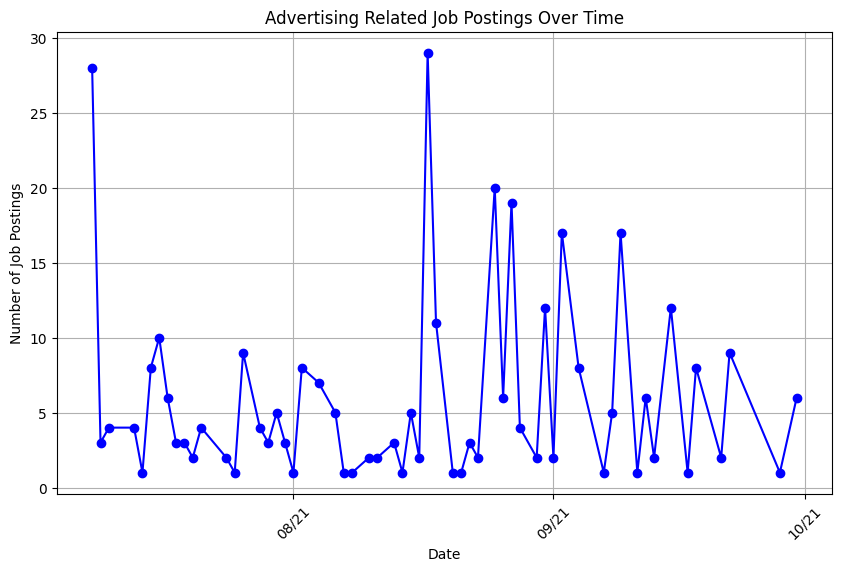

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading


# Step 1: Filter the data for advertising-related jobs
advertising_jobs = df[df['category'].str.contains('advertising', case=False, na=False) | df['job_title'].str.contains('advertising', case=False, na=False)]

# Step 2: Convert 'postdate_yyyymmdd' to datetime format
advertising_jobs['postdate_yyyymmdd'] = pd.to_datetime(advertising_jobs['postdate_yyyymmdd'], format='%Y%m%d')

# Step 3: Group by 'postdate_yyyymmdd' and count job postings
job_counts = advertising_jobs.groupby('postdate_yyyymmdd').size().reset_index(name='count')

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(job_counts['postdate_yyyymmdd'], job_counts['count'], marker='o', linestyle='-', color='b')

# Format the x-axis with the desired date format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%y'))  # e.g., "7/21", "8/21"
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Advertising Related Job Postings Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Using ARIMA model

C:\Users\Isha\AppData\Local\Temp\ipykernel_9316\74837448.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2021-07-08 00:00:00', '2021-07-08 00:00:00', '2021-07-08 00:00:00',
 '2021-07-08 00:00:00', '2021-07-08 00:00:00', '2021-07-08 00:00:00',
 '2021-07-08 00:00:00', '2021-07-08 00:00:00', '2021-07-08 00:00:00',
 '2021-07-08 00:00:00',
 ...
 '2021-09-22 00:00:00', '2021-09-22 00:00:00', '2021-09-22 00:00:00',
 '2021-09-28 00:00:00', '2021-09-30 00:00:00', '2021-09-30 00:00:00',
 '2021-09-30 00:00:00', '2021-09-30 00:00:00', '2021-09-30 00:00:00',
 '2021-09-30 00:00:00']
Length: 349, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  advertising_jobs.loc[:, 'postdate_yyyymmdd'] = pd.to_datetime(advertising_jobs['postdate_yyyymmdd'], format='%Y%m%d')


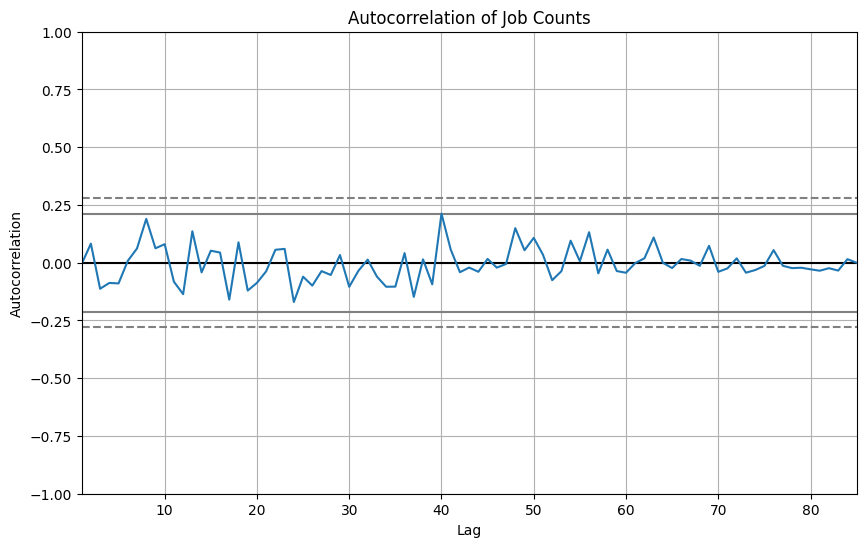

c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


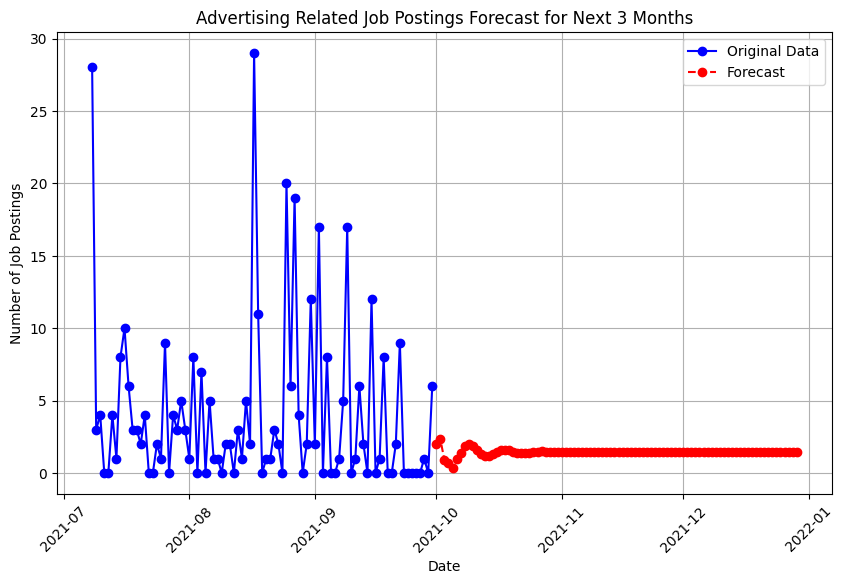

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Step 1: Filter the data for advertising-related jobs
advertising_jobs = df[df['category'].str.contains('advertising', case=False, na=False) | df['job_title'].str.contains('advertising', case=False, na=False)].copy()

# Step 2: Convert 'postdate_yyyymmdd' to datetime format
advertising_jobs.loc[:, 'postdate_yyyymmdd'] = pd.to_datetime(advertising_jobs['postdate_yyyymmdd'], format='%Y%m%d')

# Step 3: Group by 'postdate_yyyymmdd' and count job postings
job_counts = advertising_jobs.groupby('postdate_yyyymmdd').size().reset_index(name='count')

# Ensure the data is sorted and has consistent frequency
job_counts.set_index('postdate_yyyymmdd', inplace=True)
job_counts = job_counts.asfreq('D', fill_value=0)  # Fill missing days with 0 count

# Step 4: Plot the autocorrelation to choose parameters
plt.figure(figsize=(10, 6))
autocorrelation_plot(job_counts['count'])
plt.title('Autocorrelation of Job Counts')
plt.show()

# Step 5: Fit ARIMA model with tuned parameters
# Start with (p, d, q) = (1, 1, 1) and adjust based on autocorrelation plot
model = ARIMA(job_counts['count'], order=(5, 1, 2))  # Example adjustment; tune as needed
model_fit = model.fit()

# Step 6: Forecast the next 3 months
future_steps = 90  # Predict the next 90 days (approximately 3 months)
forecast = model_fit.forecast(steps=future_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')
plt.plot(forecast.index, forecast, marker='o', linestyle='--', color='r', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Advertising Related Job Postings Forecast for Next 3 Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


Using SARIMA model

c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


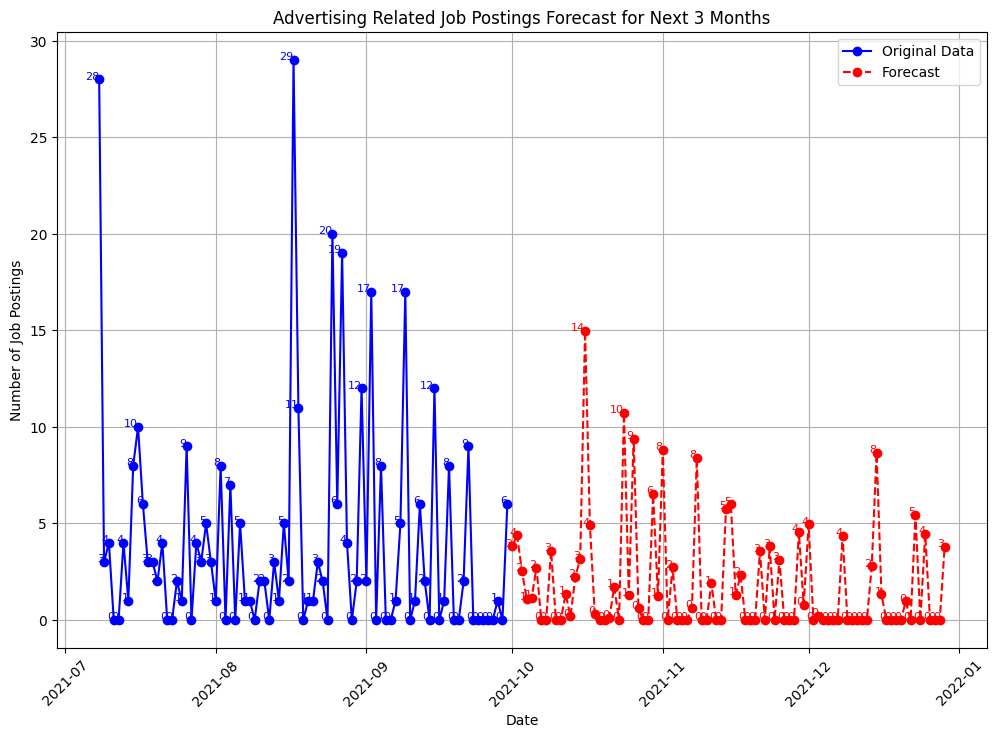

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(job_counts['count'], 
                 order=(1, 1, 1),  # Adjust ARIMA parameters
                 seasonal_order=(1, 1, 1, 30))  # Adjust seasonal parameters
model_fit = model.fit()

# Forecast the next 3 months
future_steps = 90  # Predict the next 90 days (approximately 3 months)
forecast = model_fit.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=job_counts.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')
forecast_values = forecast.predicted_mean

# Set negative values to zero
forecast_values = forecast_values.clip(lower=0)

# Plot the forecast
plt.figure(figsize=(12, 8))
plt.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')

# Plot the forecasted values
if not forecast_index.empty and not forecast_values.empty:
    plt.plot(forecast_index, forecast_values, marker='o', linestyle='--', color='r', label='Forecast')

# Annotate original data points
for i, (date, value) in enumerate(job_counts['count'].items()):
    plt.text(date, value, str(value), fontsize=8, color='blue', ha='right')

# Annotate forecast data points
for i, (date, value) in enumerate(zip(forecast_index, forecast_values)):
    plt.text(date, value, str(int(value)), fontsize=8, color='red', ha='right')

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Advertising Related Job Postings Forecast for Next 3 Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Absolute Error (MAE): 11.65
Root Mean Squared Error (RMSE): 16.05


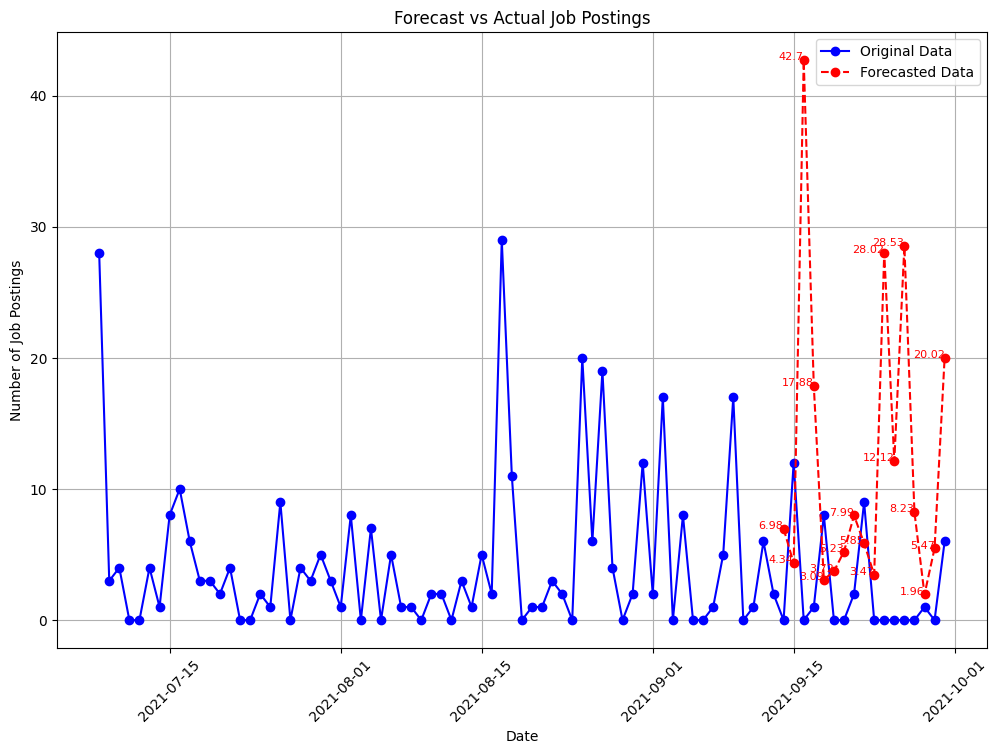

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Split the data into training and testing sets
train_size = int(len(job_counts) * 0.8)  # Use 80% of data for training
train, test = job_counts['count'][:train_size], job_counts['count'][train_size:]

# Step 2: Fit the SARIMA model on the training data
model = SARIMAX(train, 
                 order=(1, 1, 1),  # Adjust ARIMA parameters
                 seasonal_order=(1, 1, 1, 30))  # Adjust seasonal parameters
model_fit = model.fit()

# Step 3: Make predictions on the testing data
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = test.index
forecast_values = forecast.predicted_mean

# Step 4: Calculate errors
mae = mean_absolute_error(test, forecast_values)
rmse = np.sqrt(mean_squared_error(test, forecast_values))

# Print the errors
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(job_counts.index, job_counts['count'], marker='o', linestyle='-', color='b', label='Original Data')
plt.plot(test.index, forecast_values, marker='o', linestyle='--', color='r', label='Forecasted Data')

# Annotate testing data points
for i, (date, value) in enumerate(zip(test.index, forecast_values)):
    plt.text(date, value, str(round(value, 2)), fontsize=8, color='red', ha='right')

plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.title('Forecast vs Actual Job Postings')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()
